# Tests Notebook

This notebook is reserved for tests during development.

In [1]:
# Successful installation of JAX test
from jax.nn import silu
import jax.numpy as jnp

x = jnp.arange(5.0)
print(silu(x))

[0.        0.7310586 1.761594  2.8577223 3.928055 ]


## Testing Splines

Let's test the generation of spline basis functions.

In [2]:
import sys
import os

path_to_src = os.path.abspath(os.path.join(os.getcwd(), '../src'))
if path_to_src not in sys.path:
    sys.path.append(path_to_src)

from bases.splines import get_spline_basis

In [3]:
# splines order
k = 3

# the grid is initially a knot vector
grid = jnp.linspace(0, 3, 4)

# initial knot vector length
G = grid.shape[0]

# augmentation
h = (grid[-1] - grid[0]) / (G-1)
grid = (jnp.arange(-k, G + k + 1) * h + grid[0])

# Expand for broadcasting, which is degenerate here
grid = grid.reshape((1, grid.shape[0]))

# Get xs
num_x = 200
x = jnp.linspace(grid[0,0], grid[0,-1], num_x)
x_reshaped = x.reshape((num_x, 1))

In [4]:
# Call the function
basis_splines = get_spline_basis(x_reshaped, grid, k)

# Reshape
funcs = basis_splines.reshape((x_reshaped.shape[0], basis_splines.shape[-1]))

Plot the results

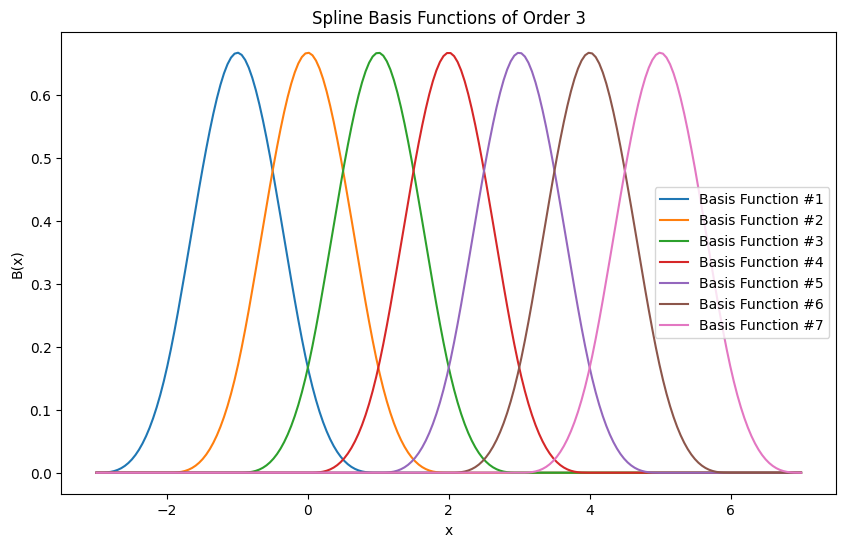

In [5]:
import matplotlib.pyplot as plt

# Create a plot
plt.figure(figsize=(10, 6))

# Plot each line
for i in range(funcs.shape[1]):
    plt.plot(x, funcs[:, i], label=f'Basis Function #{i+1}')

# Adding labels and title
plt.xlabel('x')
plt.ylabel('B(x)')
plt.title(f'Spline Basis Functions of Order {k}')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [1]:
import sys
import os

path_to_src = os.path.abspath(os.path.join(os.getcwd(), '../src'))
if path_to_src not in sys.path:
    sys.path.append(path_to_src)

from KANLayer import KANLayer as kan
import jax
from jax import numpy as jnp

In [2]:
# Instantiate the layer
kan_layer = kan(n_in=2, n_out=3, G=5, grid_range=(-1,1), k=3)

In [3]:
rng = jax.random.PRNGKey(0)
variables = kan_layer.init(rng, jnp.ones((2, 3)))

In [4]:
# Print the trainable parameters and non-trainable state
print("Trainable parameters:")
print(variables['params'])

print("\nNon-trainable state variables:")
print(variables['state'])

Trainable parameters:
{'c_basis': Array([[ 0.02399894,  0.1846351 , -0.00519568, -0.00863923,  0.0585282 ,
        -0.15037541, -0.01022594, -0.02914488],
       [ 0.04935711,  0.03238467, -0.15360688,  0.12719317,  0.04799316,
         0.05530524, -0.02173939,  0.19702375],
       [-0.06749373,  0.0200477 ,  0.23864464, -0.1581935 ,  0.0072664 ,
        -0.10175776,  0.00515934,  0.01749068],
       [-0.00339971, -0.09349852,  0.07724477,  0.04379462,  0.09954414,
         0.04300999,  0.02973044, -0.01073924],
       [ 0.05613207, -0.06796809,  0.07379916, -0.0517869 , -0.0697948 ,
         0.00100837,  0.05920225, -0.07538771],
       [-0.01342505, -0.02973855, -0.00334156, -0.09072405,  0.01592094,
        -0.04852676,  0.02748392, -0.06365392]], dtype=float32), 'c_spl': Array([1., 1., 1., 1., 1., 1.], dtype=float32), 'c_res': Array([1., 1., 1., 1., 1., 1.], dtype=float32)}

Non-trainable state variables:
{'grid': Array([[-2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. , 

In [5]:
# Simple forward pass
x, _ = kan_layer.apply(variables, jnp.ones((2,3)))

print(x)

[1. 1. 1.]


In [9]:
jnp.ones((100,6)).shape

(100, 6)

In [11]:
# No forward pass, but applying the basis function
x = jnp.ones((100,2*3))
output = kan_layer.apply(variables, x, method=kan_layer.basis)

In [13]:
output.shape

(100, 6, 8)

In [7]:
# Update variables, pass to the model and retry forward pass with new grid
variables['state'] = new_state['state']

x, state = kan_layer.apply(variables, jnp.ones((2, 3)))

print(x)

[-5.625 -5.625 -5.625]


In [8]:
# Apply the update again
x, new_state = kan_layer.apply(variables, method=kan_layer.update_grid, mutable=['state'])

print(new_state)

{'state': {'grid': Array([[-12.65625, -10.125  ,  -7.59375,  -5.0625 ,  -2.53125,   0.     ,
          2.53125,   5.0625 ,   7.59375,  10.125  ,  12.65625,  15.1875 ],
       [-12.65625, -10.125  ,  -7.59375,  -5.0625 ,  -2.53125,   0.     ,
          2.53125,   5.0625 ,   7.59375,  10.125  ,  12.65625,  15.1875 ],
       [-12.65625, -10.125  ,  -7.59375,  -5.0625 ,  -2.53125,   0.     ,
          2.53125,   5.0625 ,   7.59375,  10.125  ,  12.65625,  15.1875 ],
       [-12.65625, -10.125  ,  -7.59375,  -5.0625 ,  -2.53125,   0.     ,
          2.53125,   5.0625 ,   7.59375,  10.125  ,  12.65625,  15.1875 ],
       [-12.65625, -10.125  ,  -7.59375,  -5.0625 ,  -2.53125,   0.     ,
          2.53125,   5.0625 ,   7.59375,  10.125  ,  12.65625,  15.1875 ],
       [-12.65625, -10.125  ,  -7.59375,  -5.0625 ,  -2.53125,   0.     ,
          2.53125,   5.0625 ,   7.59375,  10.125  ,  12.65625,  15.1875 ]],      dtype=float32)}}


In [9]:
jnp.ones((2,3)).dtype

dtype('float32')

In [11]:
from flax import linen as nn

class BiasAdderWithRunningMean(nn.Module):
  decay: float = 0.99

  @nn.compact
  def __call__(self, x):
    # easy pattern to detect if we're initializing via empty variable tree
    is_initialized = self.has_variable('batch_stats', 'mean')
    ra_mean = self.variable('batch_stats', 'mean',
                            lambda s: jnp.zeros(s),
                            x.shape[1:])
    bias = self.param('bias', lambda rng, shape: jnp.zeros(shape), x.shape[1:])
    if is_initialized:
      ra_mean.value = self.decay * ra_mean.value + (1.0 - self.decay) * jnp.mean(x, axis=0, keepdims=True)

    return x - ra_mean.value + bias

In [16]:
from jax import random

key1, key2 = random.split(random.key(0), 2)
x = jnp.ones((10,5))
model = BiasAdderWithRunningMean()
variables = model.init(key1, x)
print('initialized variables:\n', variables)

initialized variables:
 {'batch_stats': {'mean': Array([0., 0., 0., 0., 0.], dtype=float32)}, 'params': {'bias': Array([0., 0., 0., 0., 0.], dtype=float32)}}


In [14]:
y, updated_state = model.apply(variables, x, mutable=['batch_stats'])
print('updated state:\n', updated_state)

updated state:
 {'batch_stats': {'mean': Array([[0.01, 0.01, 0.01, 0.01, 0.01]], dtype=float32)}}


In [7]:
import jax
import jax.numpy as jnp
import torch
import time

features, batch_size, coeffs = 100, 1000, 300

# Generate random data using PyTorch
torch.manual_seed(42)
A_torch = torch.randn(features, batch_size, coeffs)
B_torch = torch.randn(features, batch_size, 1)

# Get the same data in JAX
A_jax = jnp.array(A_torch.numpy())
B_jax = jnp.array(B_torch.numpy())

In [67]:
def solve_single_feature(A_feature, B_feature):
    B_feature = B_feature.squeeze(axis=-1)
    # Normal equations method: (A^T A) X = A^T B
    AtA = jnp.dot(A_feature.T, A_feature)
    AtB = jnp.dot(A_feature.T, B_feature)
    X_feature = jax.scipy.linalg.solve(AtA, AtB, assume_a='pos')
    return X_feature

In [68]:
# Vectorize the solver over the features dimension using JAX
solve_all_features = jax.jit(jax.vmap(solve_single_feature, in_axes=(0, 0)))

In [71]:
start_time_jax = time.time()
X_jax = solve_all_features(A_jax, B_jax)
end_time_jax = time.time()
end_time_jax - start_time_jax

1.951322317123413

In [76]:
@jax.jit
def solve_single_lstsq(A_single, B_single):
    AtA = jnp.dot(A_single.T, A_single)
    AtB = jnp.dot(A_single.T, B_single)
    single_solution = jax.scipy.linalg.solve(AtA, AtB, assume_a='pos')
    
    return single_solution

@jax.jit
def solve_full_lstsq(A_full, B_full):
    # Define the solver for (*, ., .) dimensions
    solve_full = jax.vmap(solve_single_lstsq, in_axes=(0,0))
    # Apply it to get back the coefficients
    full_solution = solve_full(A_full, B_full)

    return full_solution

In [3]:
from utils import solve_single_lstsq, solve_full_lstsq

In [23]:
start_time_jax = time.time()
X_jax = solve_full_lstsq(A_jax, B_jax)
end_time_jax = time.time()
end_time_jax - start_time_jax

0.252748966217041

In [22]:
start_time_torch = time.time()
X_torch = torch.linalg.lstsq(A_torch, B_torch).solution
end_time_torch = time.time()
end_time_torch - start_time_torch

0.1831984519958496

In [22]:
import os
os.environ["XLA_FLAGS"] = "--xla_cpu_multi_thread_eigen=true intra_op_parallelism_threads=8"

In [68]:
jnp.allclose(X_jax, X_torch.numpy(), atol=1e-6)

Array(True, dtype=bool)

In [19]:
X_torch.numpy().squeeze(-1)

array([[-0.02987486, -0.126929  , -0.03541776,  0.10165145,  0.23635085],
       [ 0.03424988, -0.19267543,  0.07763997,  0.09548306, -0.06397165],
       [ 0.03570753,  0.03324004, -0.10319803, -0.00100017,  0.00150286],
       [ 0.23008786, -0.09691177,  0.08382889,  0.0305356 ,  0.00648959],
       [-0.05567561, -0.0926005 ,  0.00745107,  0.157538  ,  0.21032903],
       [-0.08613668,  0.0764299 ,  0.01946877,  0.08630331, -0.07309464],
       [ 0.1652629 ,  0.0117617 ,  0.07199471,  0.03934181, -0.10284758],
       [ 0.18293092,  0.05756718,  0.08234952,  0.01192657, -0.04864636],
       [ 0.13961396, -0.01949576, -0.1696881 , -0.04483707,  0.15033777],
       [-0.07744469, -0.07743172, -0.22632708, -0.03954443,  0.04832212]],
      dtype=float32)